<a href="https://colab.research.google.com/github/Chiebukar/Deep-Learning/blob/main/movie_rating_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification of movie ratings using IMDB dataset**

## Import required libraries


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Import the dataset

In [2]:
from keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words= 10000)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

## Explore the data

In [3]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((25000,), (25000,), (25000,), (25000,))

In [12]:
type(train_data)

numpy.ndarray

In [5]:
type(train_data[0])

list

In [10]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [11]:
type(train_label[0]) , train_label[1].size

(numpy.int64, 1)

## Data Preprocessing

In [20]:
list_len = [len(i) for i in train_data]
max(list_len)

2494

In [19]:
list_len = [len(i) for i in test_data]
max(list_len)

2315

#### Pad each sequence of the input data to the same length

In [23]:
from keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_data,
                          value = 0,
                          padding ='post',
                          maxlen = 2494)

In [24]:
test_data = pad_sequences(test_data,
                         value = 0,
                         padding = 'post',
                         maxlen = 2494)

In [25]:
len(train_data[0]), len(train_data[1])

(2494, 2494)

In [ ]:
train_data[0]

## Build model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, GlobalAveragePooling1D

Add an embedding layer to vectorize the data and two dense layer

In [31]:
model = Sequential()
model.add(Embedding(10000, 16))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,561
Trainable params: 160,561
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [34]:
model.compile(loss = 'binary_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['accuracy'])

Create validation sets to check model performance and fit the model

In [35]:
x_val = train_data[:10000]
y_val = train_label[:10000]
x_train  = train_data[10000:]
y_train = train_label[10000:]

In [40]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 40, batch_size = 512)

Epoch 1/40
30/30 [==============================] - 3s 96ms/step - loss: 0.2134 - accuracy: 0.9207 - val_loss: 0.2892 - val_accuracy: 0.8877
Epoch 2/40
30/30 [==============================] - 3s 100ms/step - loss: 0.2094 - accuracy: 0.9231 - val_loss: 0.2893 - val_accuracy: 0.8874
Epoch 3/40
30/30 [==============================] - 3s 98ms/step - loss: 0.2082 - accuracy: 0.9229 - val_loss: 0.2902 - val_accuracy: 0.8870
Epoch 4/40
30/30 [==============================] - 3s 94ms/step - loss: 0.2045 - accuracy: 0.9250 - val_loss: 0.2879 - val_accuracy: 0.8865
Epoch 5/40
30/30 [==============================] - 3s 94ms/step - loss: 0.2001 - accuracy: 0.9255 - val_loss: 0.3275 - val_accuracy: 0.8637
Epoch 6/40
30/30 [==============================] - 3s 94ms/step - loss: 0.1966 - accuracy: 0.9271 - val_loss: 0.2886 - val_accuracy: 0.8874
Epoch 7/40
30/30 [==============================] - 3s 93ms/step - loss: 0.1946 - accuracy: 0.9278 - val_loss: 0.2907 - val_accuracy: 0.8863
Epoch 8/40
3

Visualize model performance and check for overfitting

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =range(1, len(loss)+1)

<function matplotlib.pyplot.show>

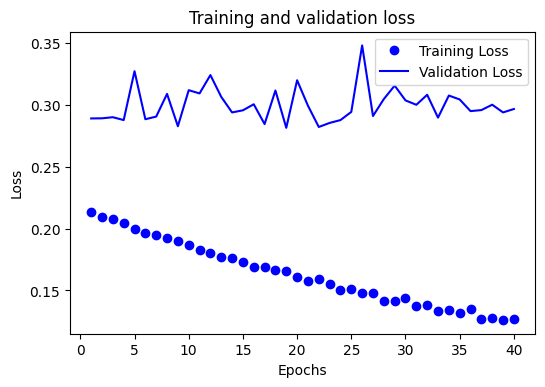

In [50]:
plt.figure(dpi= 100)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [47]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

<function matplotlib.pyplot.show>

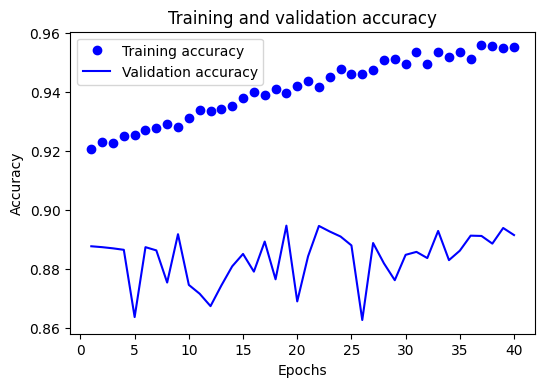

In [49]:
plt.figure(dpi= 100)
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

Reduce the complexity of the network to avoid overfitting and re- fit the model on the original training set

In [52]:
model.fit(train_data, train_label,epochs = 22, batch_size = 512)

Epoch 1/22
49/49 [==============================] - 4s 76ms/step - loss: 0.1492 - accuracy: 0.9468
Epoch 2/22
49/49 [==============================] - 4s 77ms/step - loss: 0.1469 - accuracy: 0.9470
Epoch 3/22
49/49 [==============================] - 4s 77ms/step - loss: 0.1478 - accuracy: 0.9467
Epoch 4/22
49/49 [==============================] - 4s 76ms/step - loss: 0.1439 - accuracy: 0.9492
Epoch 5/22
49/49 [==============================] - 4s 76ms/step - loss: 0.1420 - accuracy: 0.9502
Epoch 6/22
49/49 [==============================] - 4s 76ms/step - loss: 0.1409 - accuracy: 0.9494
Epoch 7/22
49/49 [==============================] - 4s 75ms/step - loss: 0.1421 - accuracy: 0.9496
Epoch 8/22
49/49 [==============================] - 4s 76ms/step - loss: 0.1382 - accuracy: 0.9520
Epoch 9/22
49/49 [==============================] - 4s 76ms/step - loss: 0.1399 - accuracy: 0.9498
Epoch 10/22
49/49 [==============================] - 4s 75ms/step - loss: 0.1362 - accuracy: 0.9519
Epoch 11/

Evaluate model performanceon test set

In [53]:
results = model.evaluate(test_data, test_label)

782/782 [==============================] - 3s 3ms/step - loss: 0.3731 - accuracy: 0.8671
